In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14
from cmap import Colormap

import numpy as np
from skimage import img_as_float
from skimage.restoration import denoise_bilateral
from skimage.morphology import disk
from skimage.morphology import erosion

from utils import *
from hu_utils import *

In [2]:
import pydicom as dicom
from pydicom.pixel_data_handlers.util import apply_modality_lut

base_dir = 'Images\\Phantom_for_calibration'
dcm = dicom.dcmread(get_scan_paths(base_dir, 'PRE_HIGH')[1])
pixel = dcm.pixel_array
hu = apply_modality_lut(pixel, dcm)

In [3]:
base_dir = 'Images\\Phantom_for_calibration'
idx_list = np.arange(730)
offset = 0  # shift between pre and post xenon slices

low_ref_maps = []
high_ref_maps = []

# trim = [0, 100, 100, 300]  # region of interest
trim = None

for idx in idx_list:
    path_low_ref = get_scan_paths(base_dir, 'PRE_LOW')[idx + offset]
    path_high_ref = get_scan_paths(base_dir, 'PRE_HIGH')[idx + offset]
    
    low_ref_hu = load_hu(path_low_ref, trim)
    high_ref_hu = load_hu(path_high_ref, trim)
    
    low_ref_maps.append(low_ref_hu)
    high_ref_maps.append(high_ref_hu)
    
low_ref_maps = np.array(low_ref_maps)
high_ref_maps = np.array(high_ref_maps)

# Image segmentation

In [ ]:
# low_ref_filtered_maps = []
# high_ref_filtered_maps = []

# for low, high in zip(low_ref_maps, high_ref_maps):
#     low = denoise_bilateral(low, sigma_color=5, sigma_spatial=2)
#     high = denoise_bilateral(high, sigma_color=5, sigma_spatial=2)
    
#     low_ref_filtered_maps.append(low)
#     high_ref_filtered_maps.append(high)
    
# low_ref_filtered_maps = np.array(low_ref_filtered_maps)
# high_ref_filtered_maps = np.array(high_ref_filtered_maps)

# np.save('xenon_ref_filtered_images/low_ref_filtered_maps.npy', low_ref_filtered_maps)
# np.save('xenon_ref_filtered_images/high_ref_filtered_maps.npy', high_ref_filtered_maps)

In [10]:
low_ref_filtered_maps = np.load('xenon_ref_filtered_images/low_ref_filtered_maps.npy')
high_ref_filtered_maps = np.load('xenon_ref_filtered_images/high_ref_filtered_maps.npy')

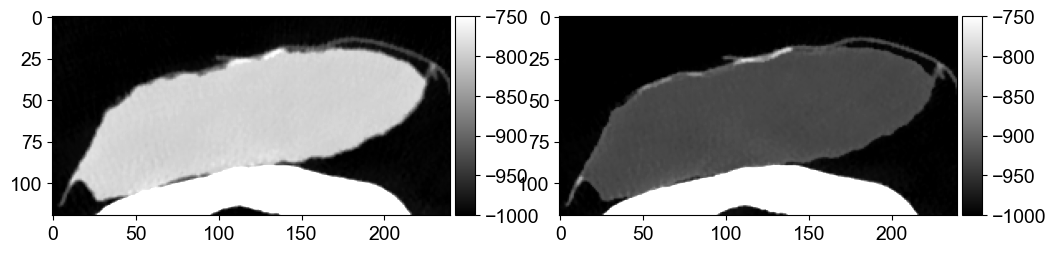

In [5]:
idx = 210

low_ref_sample = low_ref_filtered_maps[idx][80:200, 140:380]
high_ref_sample = high_ref_filtered_maps[idx][80:200, 140:380]

show_pair((low_ref_sample, high_ref_sample), (-1000, -750))

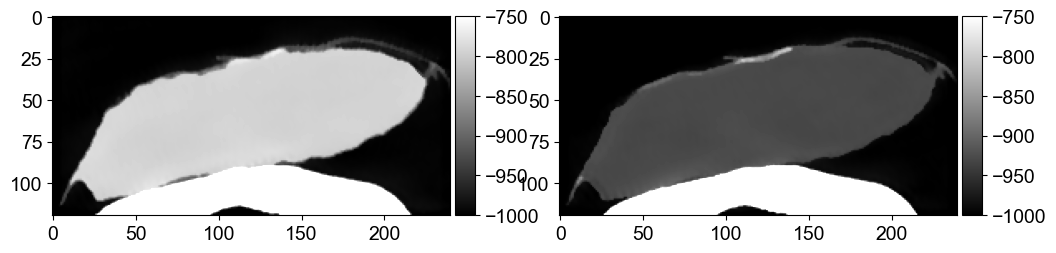

In [6]:
low_ref_sample = img_as_float(low_ref_sample)
high_ref_sample = img_as_float(high_ref_sample)

low_filtered = denoise_bilateral(low_ref_sample, sigma_color=1, sigma_spatial=2)
high_filtered = denoise_bilateral(high_ref_sample, sigma_color=1, sigma_spatial=2)

show_pair((low_filtered, high_filtered), (-1000, -750))

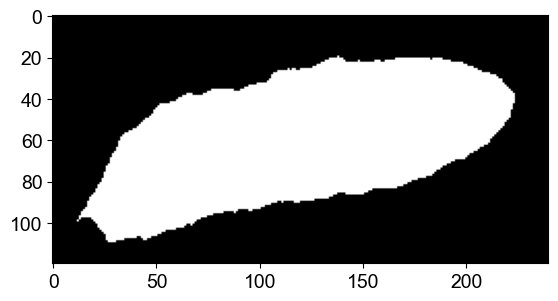

In [7]:
xenon_mask = (low_filtered > -850) & (low_filtered < -750)
xenon_mask = erosion(xenon_mask, disk(1))
plt.imshow(xenon_mask, cmap='gray')

In [8]:
xenon_intensity_low = np.mean(low_filtered[xenon_mask])
xenon_intensity_high = np.mean(high_filtered[xenon_mask])

print(f'Xenon @ 140KV: {xenon_intensity_high}')
print(f'Xenon @ 80KV: {xenon_intensity_low}')

Xenon @ 140KV: -927.705123168987
Xenon @ 80KV: -792.2258608008326
